#Import Libraries

In [ ]:
# Import the Pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#Read Data

In [ ]:
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv("/content/CC GENERAL.csv")

In [ ]:
# Print the shape of the DataFrame (number of rows and columns)
print(data.shape)

(8950, 18)


In [ ]:
# Display the first few rows of the DataFrame
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


#Cleaning

In [ ]:
# create a table with data missing
missing_values=data.isnull().sum() # missing values

percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
CUST_ID,0,0.000000
BALANCE,0,0.000000
BALANCE_FREQUENCY,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000
PURCHASES_FREQUENCY,0,0.000000
ONEOFF_PURCHASES_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


Chaque ligne indique le pourcentage de valeurs manquantes pour chaque variable, ainsi que le nombre absolu de valeurs manquantes. Par exemple, la variable 'MINIMUM_PAYMENTS' a 313 valeurs manquantes et la variable 'CREDIT_LIMIT' a une seule valeur manquante.

C'est pourquoi on a décidé de remplacer les valeurs manquantes dans les colonnes 'MINIMUM_PAYMENTS' et 'CREDIT_LIMIT' par la moyenne respective de chaque colonne.

In [ ]:
# Impute missing values in 'MINIMUM_PAYMENTS' with the mean of the column
data.loc[data['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].mean()

# Impute missing values in 'CREDIT_LIMIT' with the mean of the column
data.loc[data['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mean()

In [ ]:
data.isnull().sum().sort_values(ascending=False).head()

CUST_ID             0
BALANCE             0
PRC_FULL_PAYMENT    0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

In [ ]:
# Assuming 'data' is your DataFrame
zeros_count = data.eq(0).sum()

# Create a DataFrame to display the number of zeros in each column
zeros_count_frame = pd.DataFrame({'Column': zeros_count.index, 'Zeros_Count': zeros_count.values})

# Display the table with the number of zeros in each column
zeros_count_frame


,Column,Zeros_Count
0,CUST_ID,0
1,BALANCE,80
2,BALANCE_FREQUENCY,80
3,PURCHASES,2044
4,ONEOFF_PURCHASES,4302
5,INSTALLMENTS_PURCHASES,3916
6,CASH_ADVANCE,4628
7,PURCHASES_FREQUENCY,2043
8,ONEOFF_PURCHASES_FREQUENCY,4302
9,PURCHASES_INSTALLMENTS_FREQUENCY,3915


Ces informations fournissent un récapitulatif du nombre de valeurs nulles (zeros) pour chaque colonne. Par exemple, les colonnes comme 'CASH_ADVANCE_TRX', 'ONEOFF_PURCHASES' et 'PRC_FULL_PAYMENT' ont également un nombre significatif de valeurs nulles.

C'est pourquoi on a décidé de remplacer les zéros par la valeur moyenne dans les colonnes spécifiées, telles que 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', etc. pour atténuer l'impact des zéros, qui peuvent potentiellement biaiser certaines analyses ou modèles

In [ ]:
# Replace zeros with the mean value in columns where it makes sense
columns_to_impute = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'PAYMENTS','ONEOFF_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX']

for column in columns_to_impute:
    data[column] = data[column].replace(0, data[column].mean())


La colonne 'CUST_ID' ' ne contient pas d'informations significatives, elle peut être retirée pour simplifier le jeu de données et accélérer le processus d'analyse ou d'entraînement de modèles.

In [ ]:
data.drop(['CUST_ID'], axis=1, inplace=True)

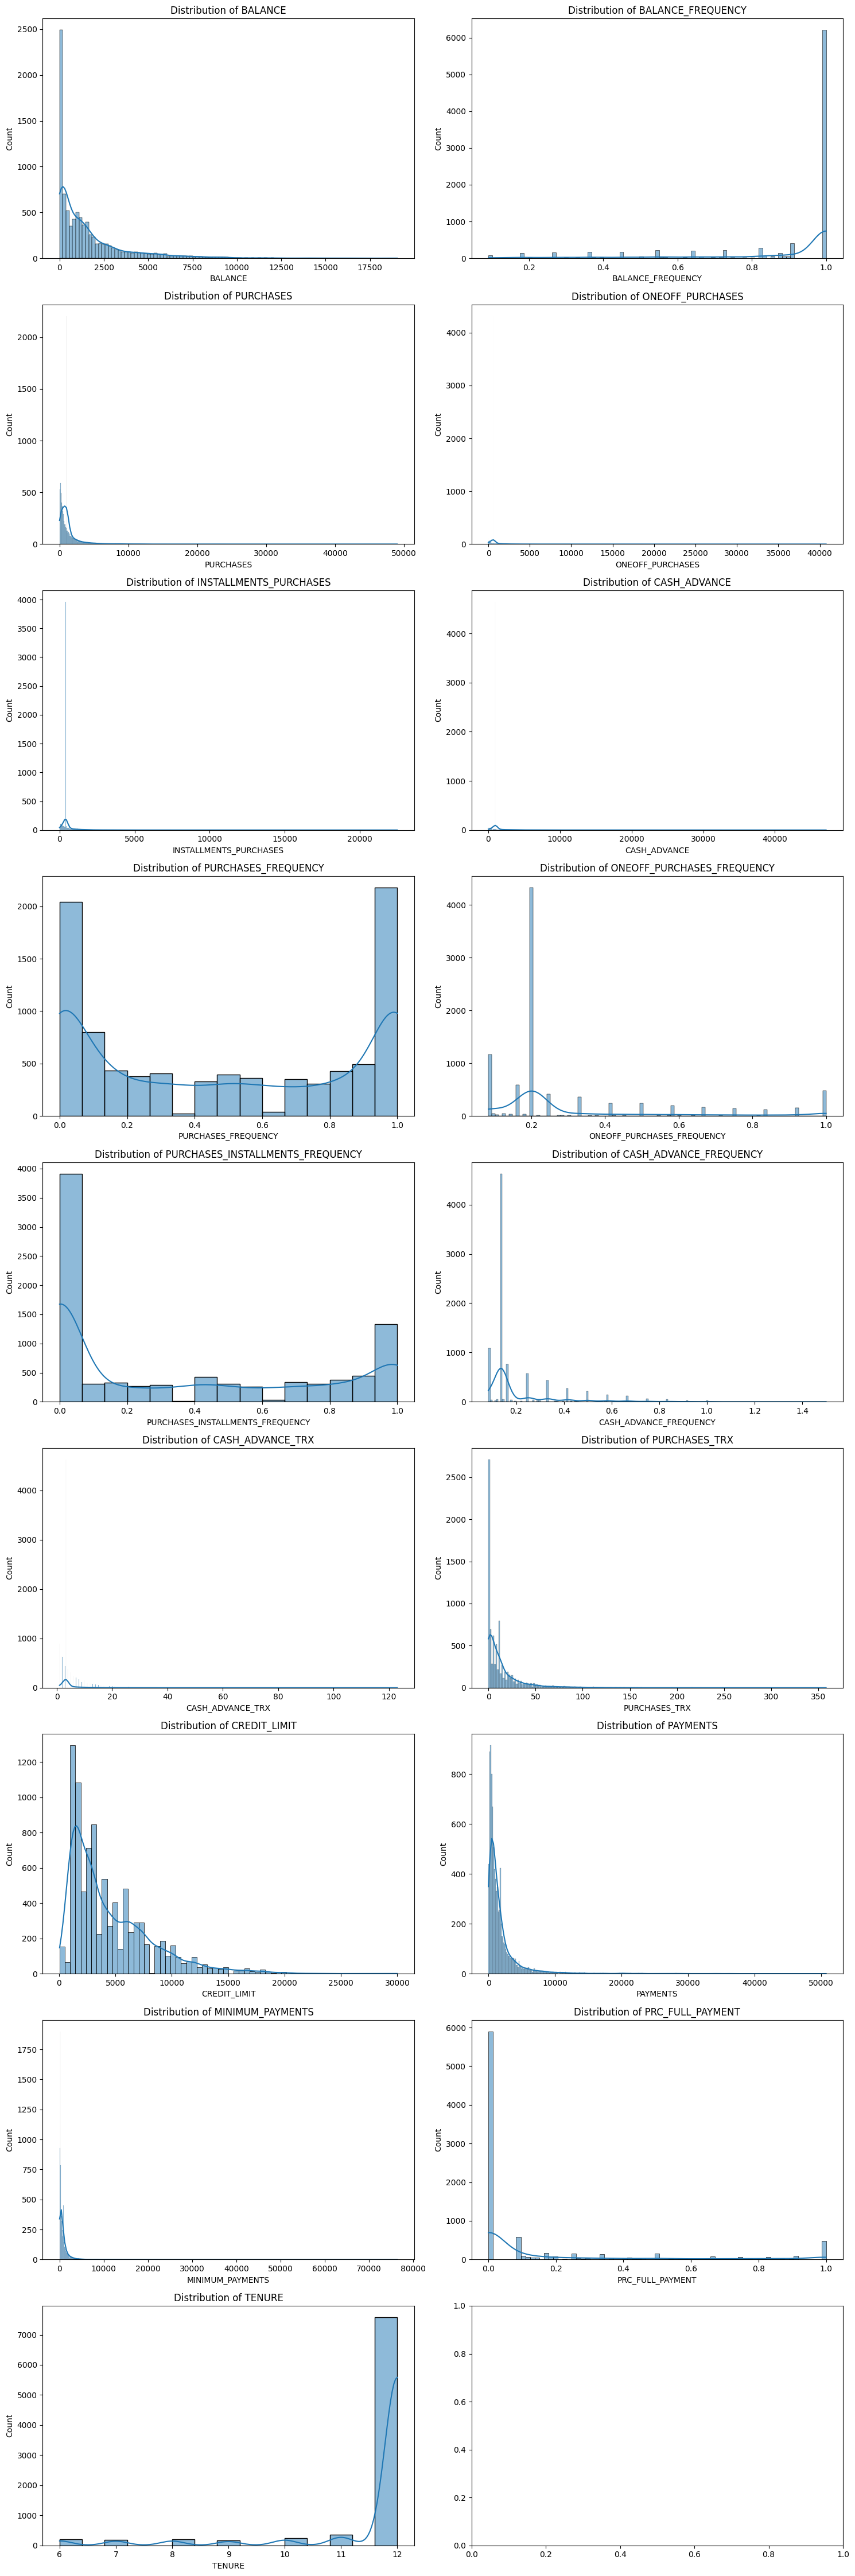

In [ ]:
# Assuming 'data' is your DataFrame
columns = data.columns

# Determine the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through columns and plot histograms
for i, column in enumerate(columns):
    sns.histplot(data[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

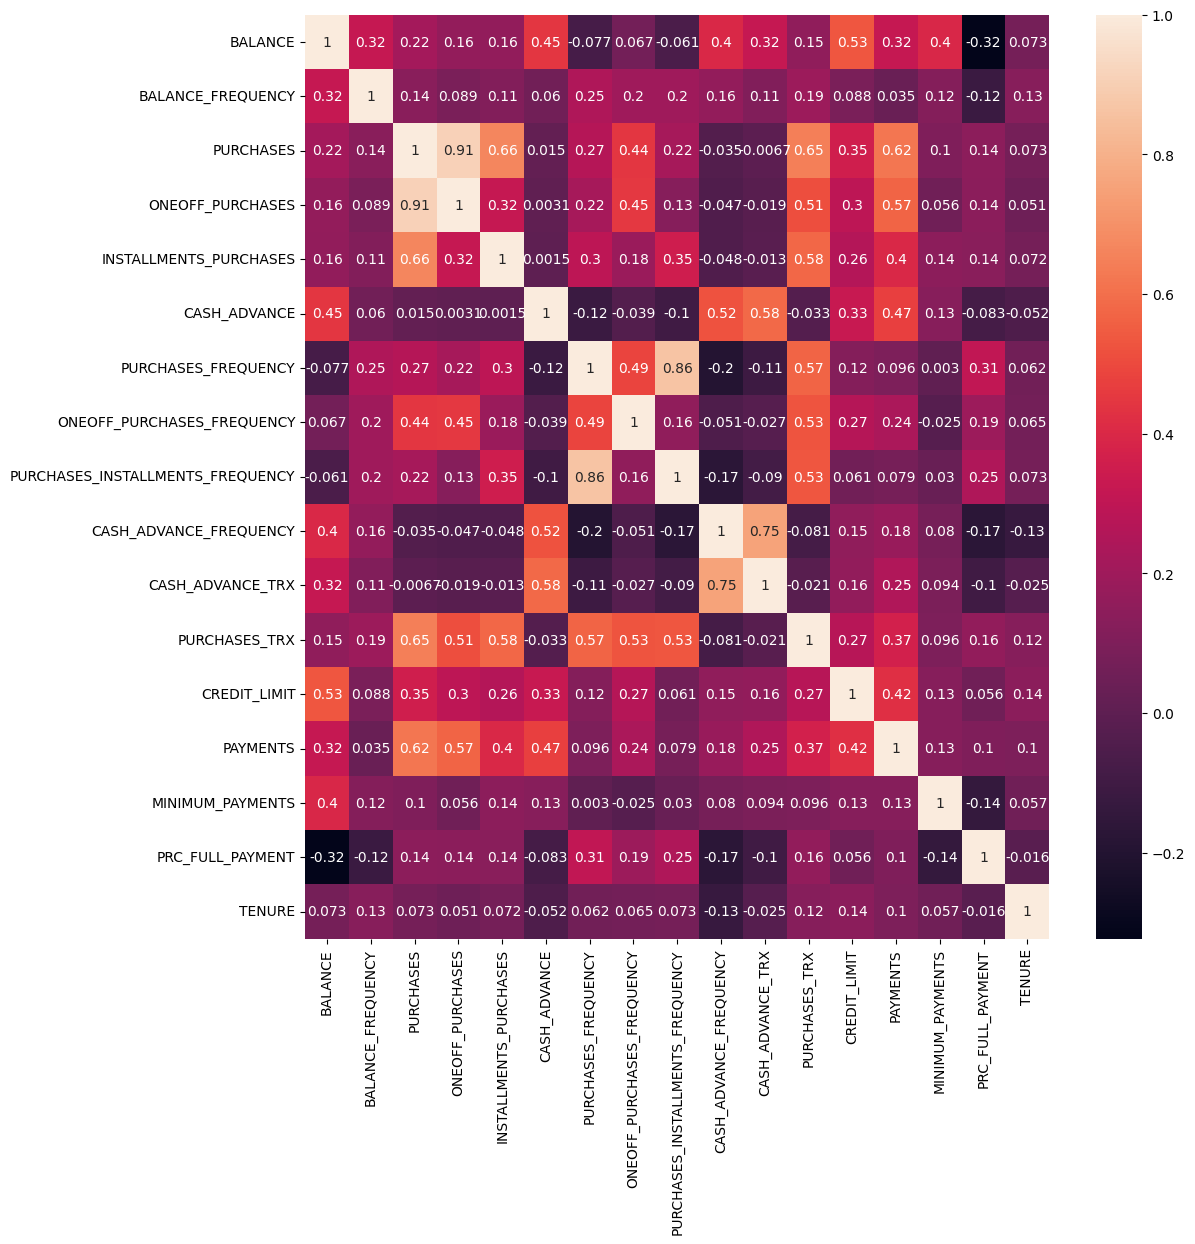

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
plt.show()


Selon le graphe de corrélation des données, nous avons observé des corrélations élevées entre certaines variables. Par exemple, "PURCHASES" et "ONEOFF_PURCHASES" sont très corrélées avec un coefficient de 0,91, de même que "PURCHASES_FREQUENCY" et "ONEOFF_PURCHASES_FREQUENCY" avec une corrélation de 0,86. De plus, "CASH_ADVANCE_TRX" et "CASH_ADVANCE" sont corrélées à hauteur de 0,75.

#PCA

Face à ces corrélations élevées entre certaines variables, plusieurs méthodes sont disponibles pour gérer la multicollinéarité. Cependant, dans ce cas, on a décidé d'utiliser l'Analyse en Composantes Principales: PCA, une technique de réduction de dimensionnalité qui a pour objectif de transformer un jeu de données de grande dimension en une représentation de plus faible dimension tout en conservant autant que possible la variance d'origine.

In [ ]:
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(data)

Le paramètre n_components dans PCA spécifie le nombre de composantes principales à conserver après la transformation. Cependant, 0.95 indique que PCA doit conserver un nombre suffisant de composantes pour expliquer 95 % de la variance dans les données d'origine.

Le pca_data résultant contient la représentation de plus faible dimension des données d'origine, où chaque colonne représente une composante principale. Ces composantes sont des combinaisons linéaires des caractéristiques d'origine et sont ordonnées par la quantité de variance qu'elles capturent.

#Scaling

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform the data
pca_data_zscored = scaler.fit_transform(pca_data)

# Create a DataFrame with the standardized features after PCA
columns = [f'PC_{i+1}' for i in range(pca_data_zscored.shape[1])]
pca_df = pd.DataFrame(data=pca_data_zscored, columns=columns)

print("DataFrame with Standardized Features after PCA:")
pca_df

DataFrame with Standardized Features after PCA:


,PC_1,PC_2,PC_3,PC_4,PC_5
0,-0.946471,0.301529,0.024624,0.181864,0.015647
1,0.942023,-0.378074,0.408045,1.896387,-0.159477
2,0.332399,-0.961500,-0.510272,-0.433786,-0.164518
3,0.447854,-0.444272,-0.592484,-0.770925,0.382459
4,-0.835607,0.207036,0.171273,0.335347,-0.142131
...,...,...,...,...,...
8945,-0.920782,0.371263,-0.007426,0.172380,-0.010622
8946,-0.901733,0.323210,0.268330,0.021918,0.185113
8947,-0.958256,0.291752,-0.003631,0.156816,-0.023480
8948,-1.023302,0.558597,-0.034025,-0.277613,-0.204064


#Model Training

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering qui identifie des groupes d'observations dans un ensemble de données en se basant sur la densité locale. Contrairement aux méthodes de clustering basées sur la distance, comme k-means, DBSCAN est capable de découvrir des clusters de forme arbitraire dans l'espace des caractéristiques et de gérer efficacement le bruit.

 L'algorithme DBSCAN commence par sélectionner un point de départ non visité.
*    Point central : Un point est considéré comme central s'il existe un nombre minimum de points (défini par le paramètre min_samples) à une distance maximale (définie par le paramètre eps) de ce point.

*   Point bordure : Un point est considéré comme bordure s'il n'est pas central, mais se trouve dans la zone de densité d'un point central.

*   Bruit : Les points qui ne sont ni centraux ni en bordure sont considérés comme du bruit.




In [ ]:
def dbscan_param_selection(X_train, X_val, eps_range, min_samples_range):
    best_score = -1
    best_params = {'eps': None, 'min_samples': None}
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X_train)
            # Calculate the number of clusters (excluding noise)
            n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
            # We calculate the Silhouette Score only if there is more than 1 cluster and less than len(X_train)-1 noise points
            if n_clusters > 1 and n_clusters < X_train.shape[0] - 1:
                score = silhouette_score(X_train, clusters)
                if score > best_score:
                    best_score = score
                    best_params['eps'] = eps
                    best_params['min_samples'] = min_samples
    return best_params, best_score,clusters

In [ ]:
data_train, data_validation = train_test_split(pca_data_zscored, test_size=0.2, random_state=42)

In [ ]:
# Setting a range of hyperparameters to test
eps_range = np.arange(0.1, 2.1, 0.1)
min_samples_range = range(2, 10)

Le score de silhouette est une mesure de la qualité d'un regroupement (clustering) dans le domaine de l'apprentissage non supervisé. Il évalue à quel point chaque objet d'un cluster est similaire aux objets de son propre cluster par rapport aux objets du cluster voisin le plus proche.

La formule du score de silhouette pour un seul point est :

\[ s = \frac{b - a}{\max(a, b)} \]

- \(a\) est la distance moyenne entre un point et les autres points du même cluster.
- \(b\) est la distance moyenne entre ce point et les points du cluster voisin le plus proche (c'est-à-dire le cluster qui n'inclut pas le point en question, mais dont la distance moyenne est la plus basse).

Le score de silhouette global pour l'ensemble du clustering est la moyenne des scores de silhouette pour chaque point.

Interprétation du score de silhouette :
- \(s\) proche de 1 indique que l'objet est bien ajusté à son propre cluster et éloigné des autres clusters.
- \(s\) proche de -1 indique que l'objet est mal ajusté à son cluster et peut être mieux placé dans un cluster voisin.
- \(s\) proche de 0 indique que l'objet est près de la frontière entre deux clusters.

En résumé, un score de silhouette plus élevé suggère un regroupement plus approprié et distinct. C'est une métrique utile pour évaluer la cohésion intra-cluster et la séparation inter-cluster dans les problèmes de clustering.

In [ ]:
# Performing hyperparameter tuning
best_params, best_score,clusters = dbscan_param_selection(data_train, data_validation, eps_range, min_samples_range)

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


Best Parameters: {'eps': 2.0, 'min_samples': 8}
Best Silhouette Score: 0.7914197291190084


In [ ]:
# Assign the cluster labels to the dataset
data_with_labels = pd.concat([data, pd.DataFrame({'Cluster_Labels': clusters})], axis=1)

# Display the dataset with cluster labels
print("Dataset with Cluster Labels:")
data_with_labels.head()

Dataset with Cluster Labels:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Labels
0,40.900749,0.818182,95.400000,592.437371,95.400000,978.871112,0.166667,0.202458,0.083333,0.135144,3.248827,2,1000.0,201.802084,139.509787,0.000000,12,0.0
1,3202.467416,0.909091,1003.204834,592.437371,411.067645,6442.945483,0.000000,0.202458,0.000000,0.250000,4.000000,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0
2,2495.148862,1.000000,773.170000,773.170000,411.067645,978.871112,1.000000,1.000000,0.000000,0.135144,3.248827,12,7500.0,622.066742,627.284787,0.000000,12,0.0
3,1666.670542,0.636364,1499.000000,1499.000000,411.067645,205.788017,0.083333,0.083333,0.000000,0.083333,1.000000,1,7500.0,1733.143852,864.206542,0.000000,12,0.0
4,817.714335,1.000000,16.000000,16.000000,411.067645,978.871112,0.083333,0.083333,0.000000,0.135144,3.248827,1,1200.0,678.334763,244.791237,0.000000,12,0.0
